# Praca domowa 8

## Wykres z internetu
![original](hw8_pic1.png)
https://www.ecdc.europa.eu/en/covid-19/situation-updates/weekly-maps-coordinated-restriction-free-movement

## Poprawiona wersja

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
data = pd.read_csv("data.csv") # pobrane z tej samej strony co i wykres
data1 = data.groupby(by="country").apply(lambda x: 10**5 * (x.subnational_cases_14).sum()/x.national_population).drop_duplicates()
data1 = data1.reset_index().drop('level_1', 1)
data1 = data1.rename(columns={'national_population': 'notification_rate'})
data2 = data[["country", "national_positivity_rate"]].drop_duplicates().reset_index().drop("index", 1)
data2
plot_data = pd.merge(data1, data2, on = "country")
plot_data = plot_data.drop(plot_data.index[[15]]).reset_index().drop("index", 1) # jedno państwo miało niekompletne dane

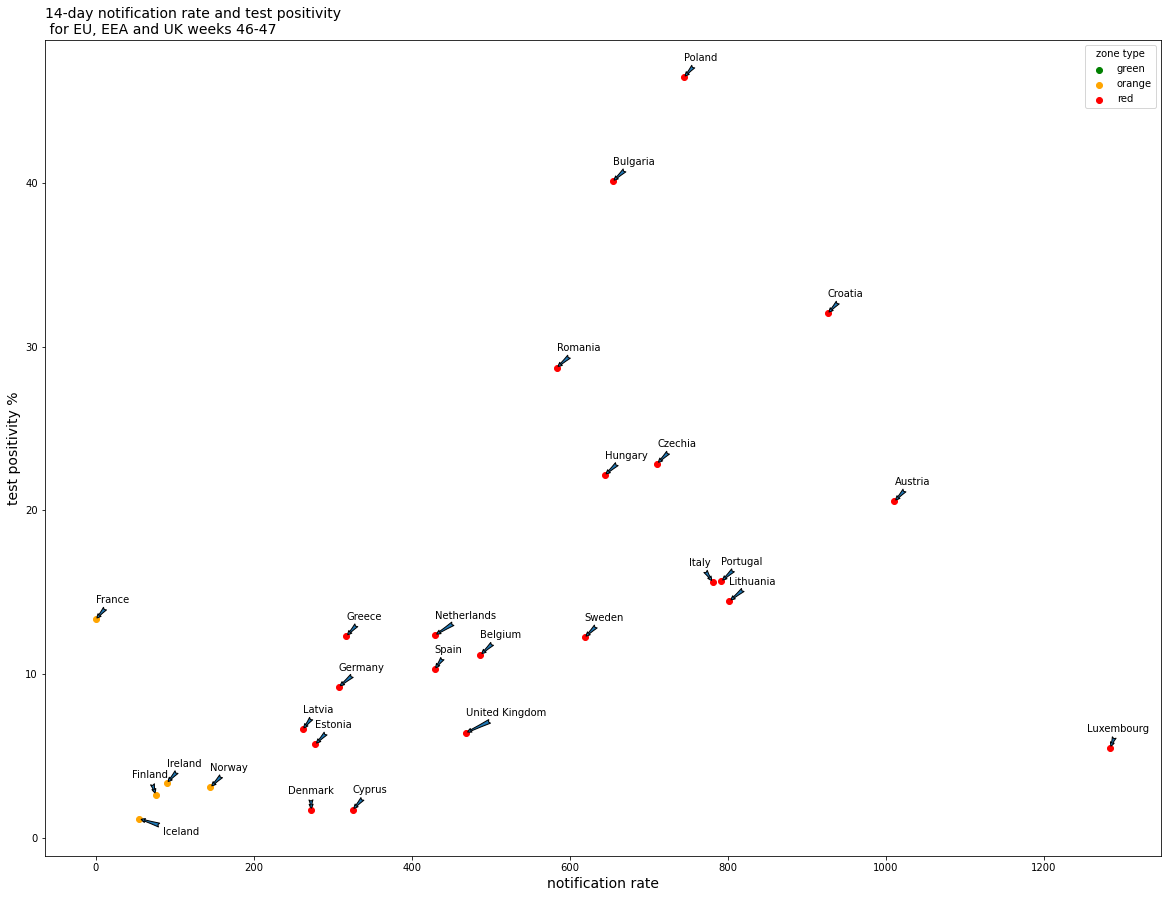

In [164]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(15)

green_zone_notification_rate = []
green_zone_national_positivity_rate = []

orange_zone_notification_rate = []
orange_zone_national_positivity_rate = []

red_zone_notification_rate = []
red_zone_national_positivity_rate = []

for i in range(len(plot_data)):
    if plot_data["notification_rate"][i] < 25 and plot_data["national_positivity_rate"][i] < 4:
        green_zone_notification_rate.append(plot_data["notification_rate"][i])
        green_zone_national_positivity_rate.append(plot_data["national_positivity_rate"][i])
    
    elif (plot_data["notification_rate"][i] < 50 and plot_data["national_positivity_rate"][i] >= 4) or (25 <= plot_data["notification_rate"][i] <= 150 and plot_data["national_positivity_rate"][i] < 4):
        orange_zone_notification_rate.append(plot_data["notification_rate"][i])
        orange_zone_national_positivity_rate.append(plot_data["national_positivity_rate"][i])
        
    elif (plot_data["notification_rate"][i] >= 50 and plot_data["national_positivity_rate"][i] >= 4) or (plot_data["notification_rate"][i] >= 150):
        red_zone_notification_rate.append(plot_data["notification_rate"][i])
        red_zone_national_positivity_rate.append(plot_data["national_positivity_rate"][i])
    
ax.scatter(green_zone_notification_rate, green_zone_national_positivity_rate, color = "green", label = "green")
ax.scatter(orange_zone_notification_rate, orange_zone_national_positivity_rate, color = "orange", label = "orange")
ax.scatter(red_zone_notification_rate, red_zone_national_positivity_rate, color = "red", label = "red")

ax.legend(title="zone type", loc=1)

for i in range(len(plot_data)):
    if plot_data["country"][i] == "Italy" or plot_data["country"][i] == "Luxembourg" or plot_data["country"][i] == "Denmark" or plot_data["country"][i] == "Finland":
        ax.annotate(plot_data["country"][i], (plot_data["notification_rate"][i], plot_data["national_positivity_rate"][i]), 
               arrowprops = dict(arrowstyle="fancy"),
               xytext = (plot_data["notification_rate"][i] - 30, plot_data["national_positivity_rate"][i] + 1))
        
        
    elif plot_data["country"][i] == "Iceland":
        ax.annotate(plot_data["country"][i], (plot_data["notification_rate"][i], plot_data["national_positivity_rate"][i]), 
               arrowprops = dict(arrowstyle="fancy"),
               xytext = (plot_data["notification_rate"][i] + 30, plot_data["national_positivity_rate"][i] - 1))
        
        
    else:
        ax.annotate(plot_data["country"][i], (plot_data["notification_rate"][i], plot_data["national_positivity_rate"][i]), 
               arrowprops = dict(arrowstyle="fancy"),
               xytext = (plot_data["notification_rate"][i], plot_data["national_positivity_rate"][i] + 1))
    
ax.set_title('14-day notification rate and test positivity\n for EU, EEA and UK weeks 46-47', loc='left', fontsize=14)

plt.xlabel("notification rate", fontsize=14)
plt.ylabel("test positivity %", fontsize=14)


plt.show()

## Uzasadnienie
Wadą mapy jest to, że widać tylko strefy do których poszczególne państwa należą, lecz nie widać dokładnych statystyk z tych państw. Na scatterplocie zaś łatwo można te statystyki pokazać, dzięki czemu łatwiej będzie zauważać różnice i ewentualne zależności między nimi.